# Week 6 of Introduction to Biological System Design
## Dynamical System Analysis Tools
### Ayush Pandey

Pre-requisite: To get the best out of this notebook, make sure that you have the basic understanding of ordinary differential equations. For more information on ODEs you may refer to any standard book on engineering math. To learn more about how to numerically simulate ODEs, refer to [week3_intro_ode.ipynb](https://pages.hmc.edu/pandey/reading/week3_intro_ode.ipynb)

You can learn more about Feedback Systems from [this chapter](https://fbswiki.org/wiki/index.php/Introduction) of the book on Introduction to Feedback Systems by Murray and Astrom.


One of the first transcriptional activators discovered in bacteria is the AraC transcription factor. One of the primary functions of the AraC family transcription factors is to regulate sugar catabolism and utilizing the sugar in cells for various metabolic functions. 

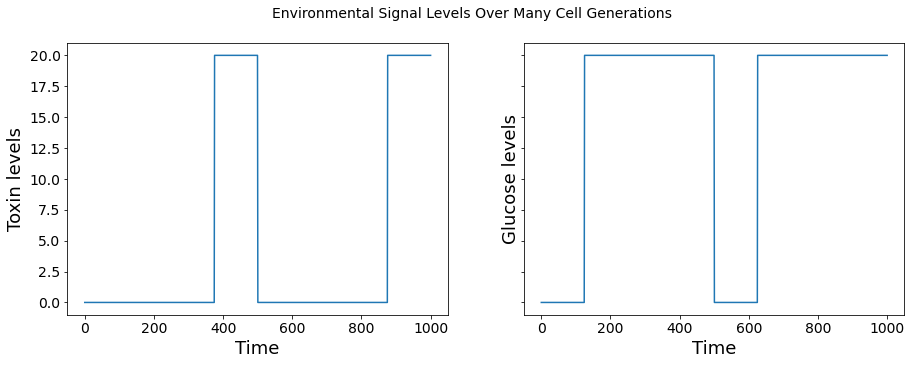

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
timepoints = np.linspace(0, 1000, 1000, endpoint = True)
max_toxin_value = 20 #arbitrary units
toxin_signal = max_toxin_value*np.ones_like(timepoints) *\
-1*signal.square(2*np.pi*2*timepoints, duty = 0.75)

# Cut off the signal at 0 so that there are no negative values
for i, s in enumerate(toxin_signal):
    if s < 0:
        toxin_signal[i] = 0
        
fig, ax = plt.subplots(1,2, figsize = (15,5), sharey = True)
ax[0].plot(timepoints, toxin_signal)
ax[0].set_xlabel('Time', fontsize = 18)
ax[0].set_ylabel('Toxin levels', fontsize = 18)
ax[0].tick_params(labelsize = 14)


max_glucose_value = 20 #arbitrary units
glucose_signal = max_glucose_value*np.ones_like(timepoints) *\
-1*signal.square(2*np.pi*2*timepoints, duty = 0.25)
for i, s in enumerate(glucose_signal):
    if s < 0:
        glucose_signal[i] = 0
ax[1].plot(timepoints, glucose_signal)
ax[1].set_xlabel('Time', fontsize = 18)
ax[1].set_ylabel('Glucose levels', fontsize = 18)
ax[1].tick_params(labelsize = 14)
fig.suptitle('Environmental Signal Levels Over Many Cell Generations', fontsize = 14);